<a href="https://colab.research.google.com/github/sk-6113/FUTURE_DS_01/blob/main/FUTURE_DS_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First 5 rows of the dataset:


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,2013-06-13,2013-06-17,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Ca

,Quantity
Product Name,
Staples,876
KI Adjustable-Height Table,74
Storex Dura Pro Binders,71
Avery Non-Stick Binders,71
GBC Premium Transparent Covers with Diagonal Lined Pattern,67
"Situations Contoured Folding Chairs, 4/Set",64
Chromcraft Round Conference Tables,61
Eldon Wave Desk Accessories,61
Wilson Jones Turn Tabs Binder Tool for Ring Binders,59


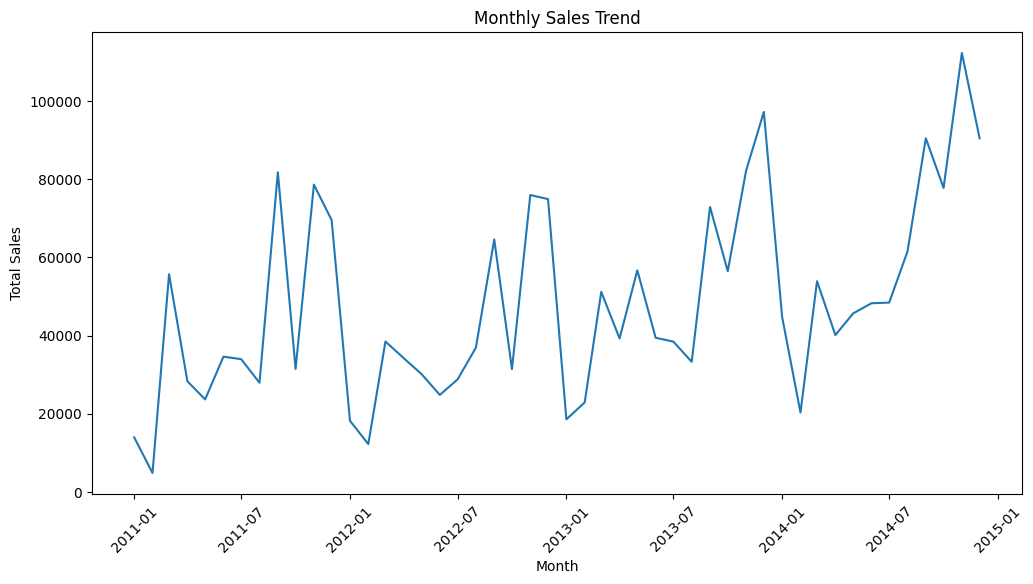


Revenue by Category:


,Sales
Category,
Technology,836154.0330
Furniture,741999.7953
Office Supplies,719047.0320


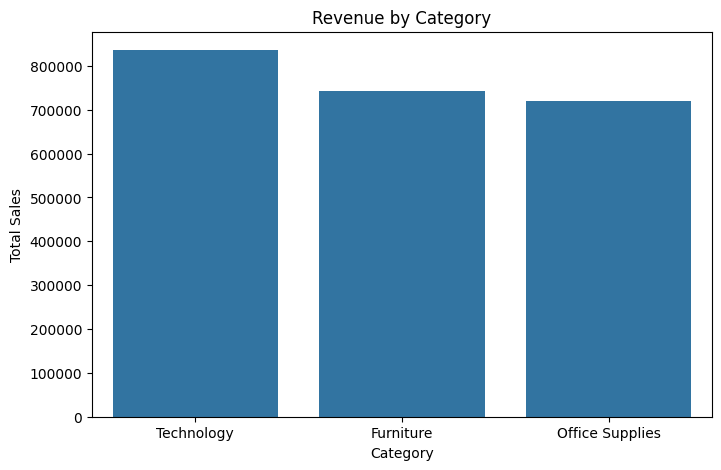


Cleaned data saved as 'cleaned_superstore.csv'


In [ ]:
!pip install pandas openpyxl matplotlib seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "/content/superstore.xls"
df = pd.read_excel("/content/drive/MyDrive/superstore.xls")

print("First 5 rows of the dataset:")
display(df.head())

print("\nDataset info:")
df.info()

df = df.dropna()

best_selling = df.groupby("Product Name")["Quantity"].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Best-Selling Products:")
display(best_selling)

df["Order Date"] = pd.to_datetime(df["Order Date"])
sales_trend = df.groupby(df["Order Date"].dt.to_period("M"))["Sales"].sum()
sales_trend.index = sales_trend.index.to_timestamp()

plt.figure(figsize=(12,6))
sns.lineplot(x=sales_trend.index, y=sales_trend.values)
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

category_revenue = df.groupby("Category")["Sales"].sum().sort_values(ascending=False)
print("\nRevenue by Category:")
display(category_revenue)

plt.figure(figsize=(8,5))
sns.barplot(x=category_revenue.index, y=category_revenue.values)
plt.title("Revenue by Category")
plt.ylabel("Total Sales")
plt.show()

df.to_csv("/content/cleaned_superstore.csv", index=False)
print("\nCleaned data saved as 'cleaned_superstore.csv'")
